# 📊 Exploratory Visualizations

This notebook presents key visualizations to understand employee satisfaction patterns, department-wise trends, and feature relationships. These insights support model design and HR recommendations.

In [1]:
# 📥 Load Cleaned Data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../../data/processed/employee_data_cleaned.csv')
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,0,40,1,1,1,3,9,1,5,4,...,3,20,2,3,18,13,1,12,0,4
1,1,30,1,2,0,3,9,2,27,5,...,4,10,2,2,8,7,7,7,0,4
2,2,52,1,2,1,3,4,2,3,4,...,1,34,3,4,34,6,1,16,0,4
3,3,25,0,3,2,3,9,2,26,1,...,2,6,5,2,6,5,1,4,0,4
4,4,34,1,4,2,3,9,2,2,3,...,3,6,5,3,6,5,1,4,0,4


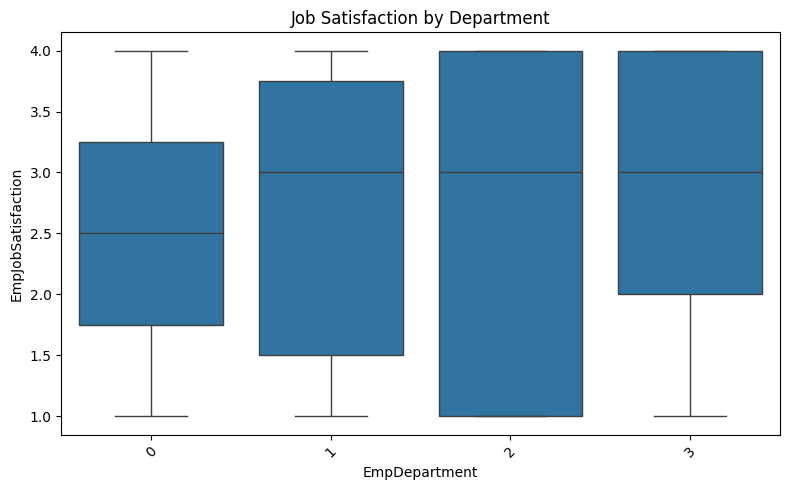

In [4]:
# 🏢 EmpDepartment vs Job Satisfaction

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x='EmpDepartment', y='EmpJobSatisfaction', data=df)
plt.title('Job Satisfaction by Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

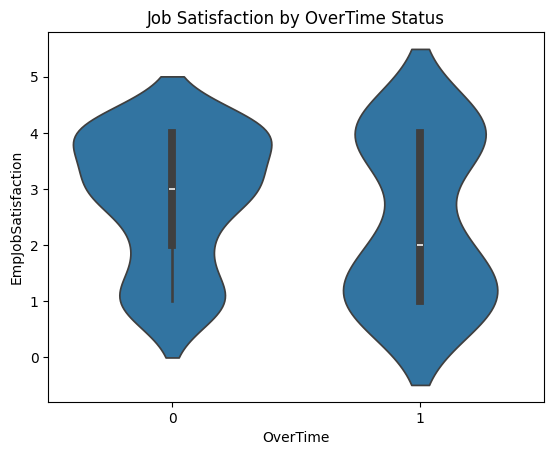

In [5]:
# ⏱️ OverTime vs Job Satisfaction

sns.violinplot(x='OverTime', y='EmpJobSatisfaction', data=df)
plt.title('Job Satisfaction by OverTime Status')
plt.show()

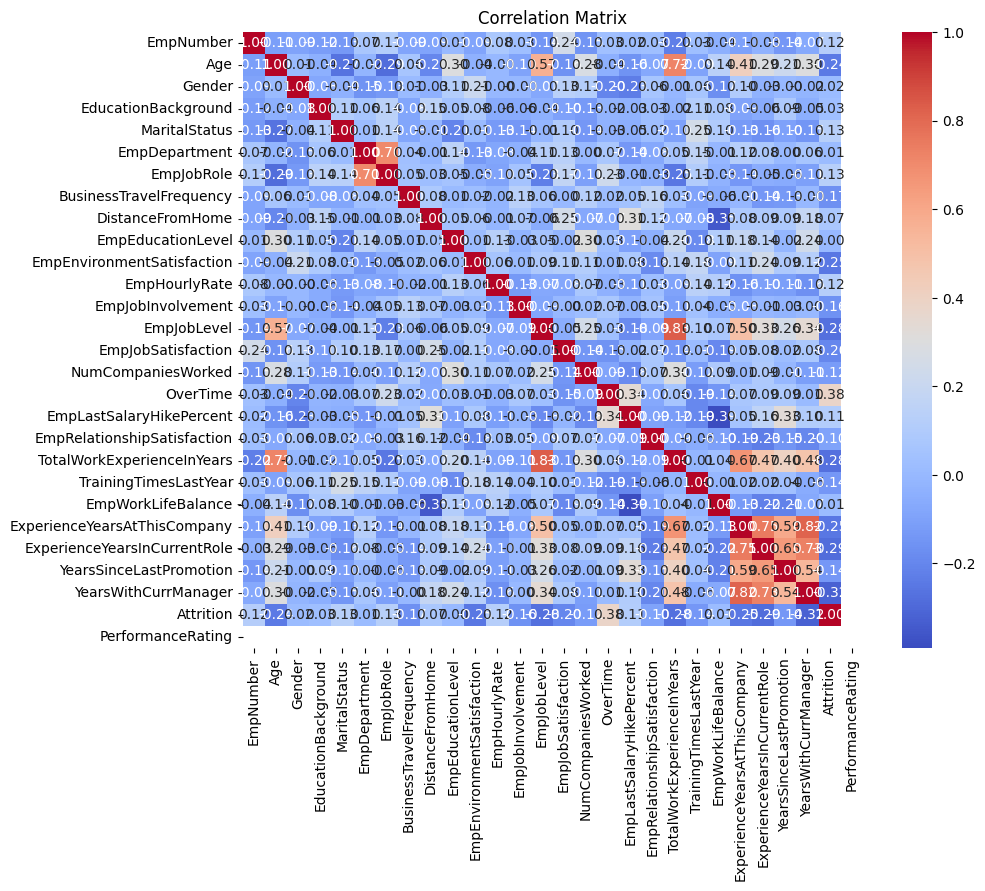

In [6]:
# 🔗 Correlation Heatmap

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

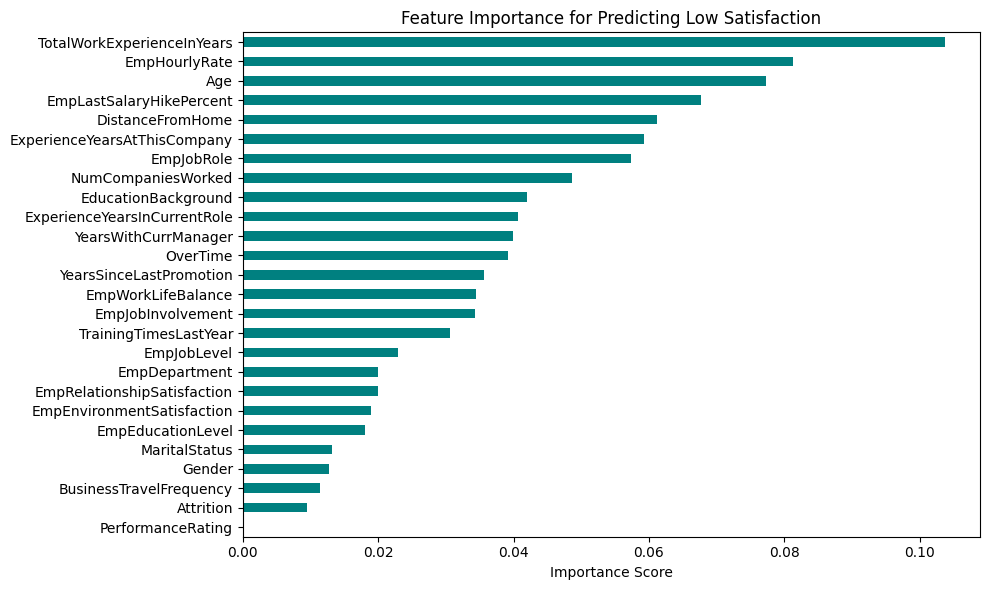

In [11]:
# 🌟 Feature Importance from Random Forest

import joblib
import pandas as pd
import matplotlib.pyplot as plt

# Load model
model = joblib.load('../../src/models/rf_model.pkl')

# Prepare features (drop only what's present)
X = df.drop(columns=['EmpNumber', 'EmpJobSatisfaction'], errors='ignore')

# Get feature importances
importances = model.feature_importances_
features = pd.Series(importances, index=X.columns).sort_values()

# Plot
plt.figure(figsize=(10,6))
features.plot(kind='barh', color='teal')
plt.title('Feature Importance for Predicting Low Satisfaction')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

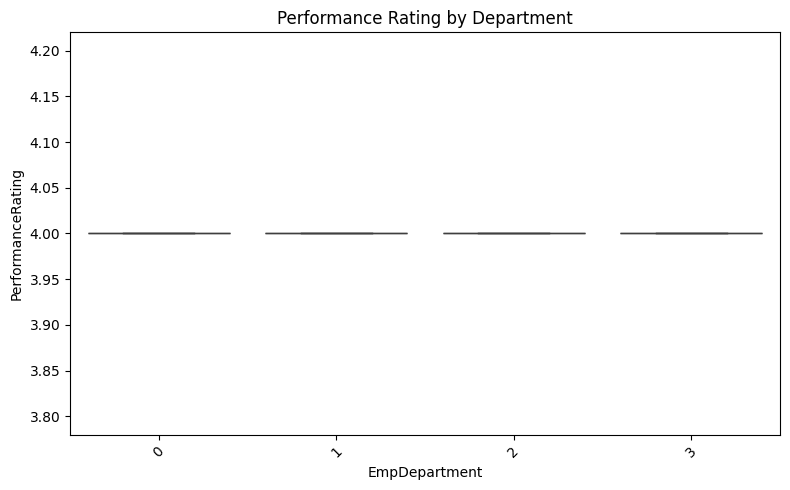

In [12]:
# 🏢 EmpDepartment vs Performance Rating

plt.figure(figsize=(8,5))
sns.boxplot(x='EmpDepartment', y='PerformanceRating', data=df)
plt.title('Performance Rating by Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()